In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# === Passo 1. Carregar o dataset ===
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
vinhos = pd.read_csv(url, sep=';')

In [3]:
# === Passo 2: Mostrar as 5 primeiras linhas ===
print("=== Primeiras linhas do conjunto de dados ===")
print(vinhos.head())

=== Primeiras linhas do conjunto de dados ===
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        

In [4]:
# === Passo 3: Estrutura geral ===
print("\n=== Informações sobre o dataset ===")
print(vinhos.info())


=== Informações sobre o dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [5]:
# === Passo 4: Dimensões e nomes das colunas ===
print("\n=== Estrutura ===")
print(f"Total de observações: {vinhos.shape[0]}")
print(f"Total de variáveis: {vinhos.shape[1]}")
print(f"Nomes das colunas: {list(vinhos.columns)}")


=== Estrutura ===
Total de observações: 1599
Total de variáveis: 12
Nomes das colunas: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [6]:
# === Passo 5: Estatísticas descritivas ===
print("\n=== Estatísticas descritivas ===")
print(vinhos.describe().round(2))


=== Estatísticas descritivas ===
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count        1599.00           1599.00      1599.00         1599.00   
mean            8.32              0.53         0.27            2.54   
std             1.74              0.18         0.19            1.41   
min             4.60              0.12         0.00            0.90   
25%             7.10              0.39         0.09            1.90   
50%             7.90              0.52         0.26            2.20   
75%             9.20              0.64         0.42            2.60   
max            15.90              1.58         1.00           15.50   

       chlorides  free sulfur dioxide  total sulfur dioxide  density       pH  \
count    1599.00              1599.00               1599.00  1599.00  1599.00   
mean        0.09                15.87                 46.47     1.00     3.31   
std         0.05                10.46                 32.90     0.00     0.15   
mi

In [16]:
2.1/9.3

0.22580645161290322

In [7]:
# === Passo 6: Verificar valores ausentes ===
print("\n=== Valores ausentes por coluna ===")
print(vinhos.isnull().sum())


=== Valores ausentes por coluna ===
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


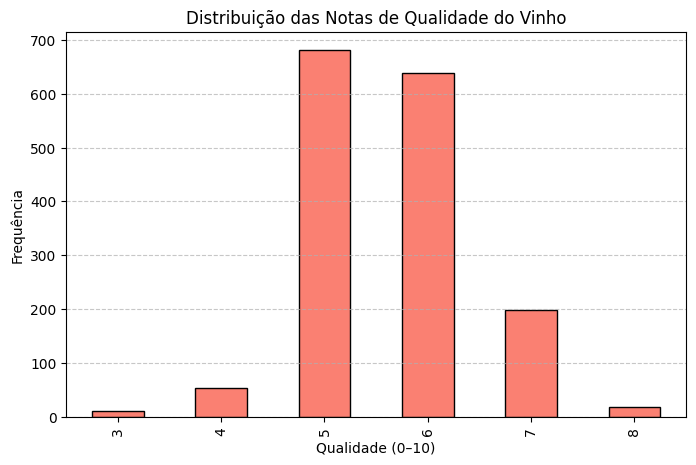

In [8]:
# === Passo 7: Distribuição da variável alvo (qualidade) ===
plt.figure(figsize=(8,5))
vinhos["quality"].value_counts().sort_index().plot(kind="bar", color="salmon", edgecolor="black")
plt.title("Distribuição das Notas de Qualidade do Vinho")
plt.xlabel("Qualidade (0–10)")
plt.ylabel("Frequência")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

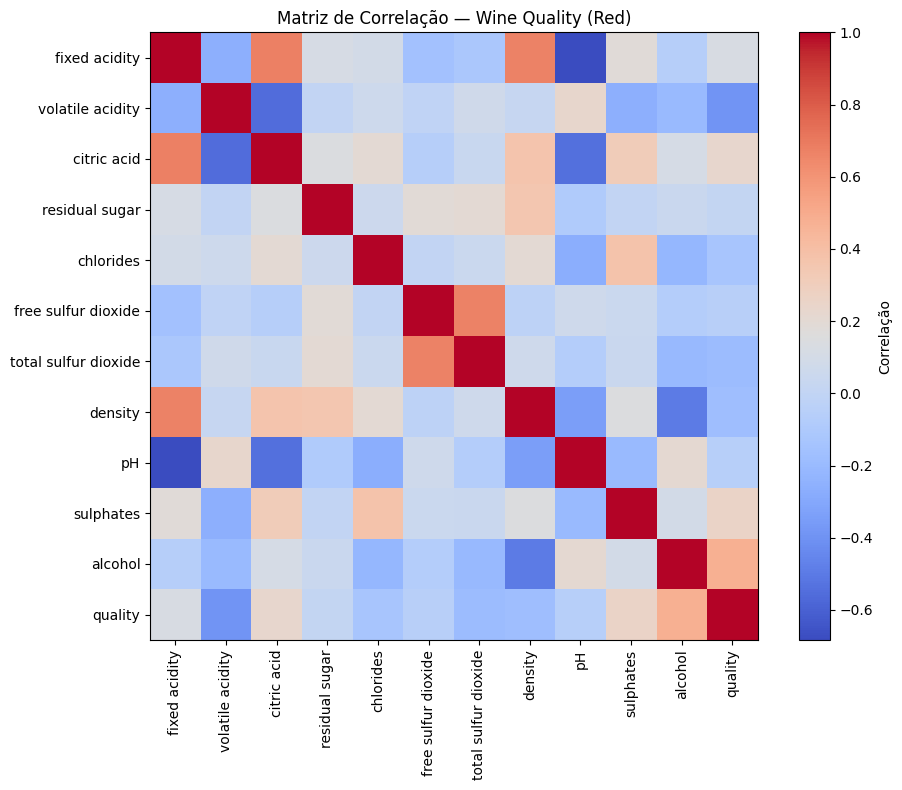

In [9]:
# === Passo 8: Correlação entre variáveis ===
plt.figure(figsize=(10,8))
corr = vinhos.corr(numeric_only=True)
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Correlação")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Matriz de Correlação — Wine Quality (Red)")
plt.tight_layout()
plt.show()

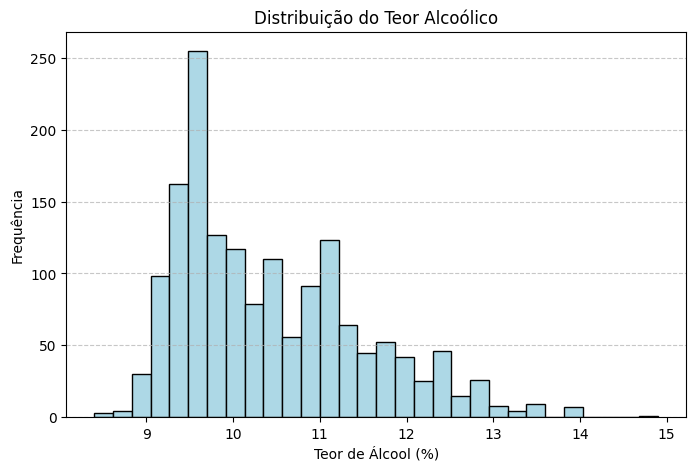

In [10]:
# === Passo 9: Exemplo de análise univariada ===
plt.figure(figsize=(8,5))
plt.hist(vinhos["alcohol"], bins=30, color="lightblue", edgecolor="black")
plt.title("Distribuição do Teor Alcoólico")
plt.xlabel("Teor de Álcool (%)")
plt.ylabel("Frequência")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

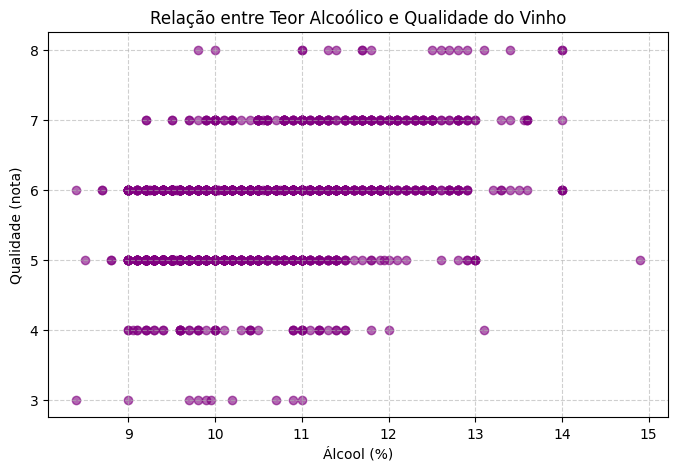

In [11]:
# === Passo 10: Exemplo de relação entre variáveis ===
plt.figure(figsize=(8,5))
plt.scatter(vinhos["alcohol"], vinhos["quality"], alpha=0.6, color="purple")
plt.title("Relação entre Teor Alcoólico e Qualidade do Vinho")
plt.xlabel("Álcool (%)")
plt.ylabel("Qualidade (nota)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()